Tamanho do passo calculado: 0.1295268929604968
Melhor resultado: x = 0.801591645130932, y = 0.672064752170435, valor = 0.12648286067379746
Pior resultado: x = 2.096860574735901, y = -2.048, valor = 4154.779090086123


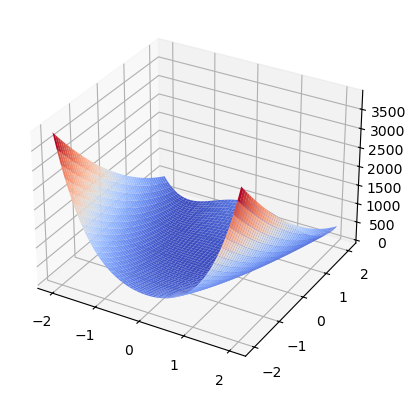

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#função para iterar com um passo decimal
def drange(start, stop, step):
     r = start
     while r < stop:
         yield r
         r += step

# Função de Rosenbrock
def rosenbrock(args):
    x,y=args
    return (1 - x)**2 + 100*(y - x**2)**2

# Função para calcular o tamanho do passo
def calcular_tamanho_passo(num_pontos, limite_inferior, limite_superior):
    # Calcula o tamanho do passo necessário para distribuir os pontos uniformemente
    area_total = (limite_superior - limite_inferior) ** 2
    tamanho_passo = np.sqrt(area_total / num_pontos)
    return tamanho_passo

# Função de busca sequencial
def busca_sequencial(tamanho_passo, limite_inferior, limite_superior):
    melhor_x = None
    melhor_y = None
    melhor_valor = np.inf
    pior_x = None
    pior_y = None
    pior_valor = -np.inf


    melhores_dominios = []
    melhores_imagens = []
    dominio_x = []
    dominio_y = []
    imagem = []

    # Loop sobre o domínio em uma grade regular
    for x in np.arange(limite_inferior, limite_superior + tamanho_passo, tamanho_passo):
        for y in np.arange(limite_inferior, limite_superior + tamanho_passo, tamanho_passo):
            valor = rosenbrock([x, y])  # Passando uma lista de dois valores
            if melhor_valor > valor:
                melhor_valor = valor
                melhor_x = x
                melhor_y = y

            if valor > pior_valor:
                pior_valor = valor
                pior_x = x
                pior_y = y

            melhores_dominios.append((melhor_x, melhor_y))
            melhores_imagens.append(melhor_valor)
            dominio_x.append(x)
            dominio_y.append(y)
            imagem.append(valor)

    return melhor_x, melhor_y, melhor_valor, pior_x, pior_y, pior_valor, dominio_x, dominio_y, imagem, melhores_dominios, melhores_imagens


# Definir os parâmetros para o domínio [-5, 10]
limite_inferior = -2.048
limite_superior = 2.048
num_pontos = 1000

# Calcular o tamanho do passo
tamanho_passo = calcular_tamanho_passo(num_pontos, limite_inferior, limite_superior)
print(f"Tamanho do passo calculado: {tamanho_passo}")

# Executar a busca sequencial
melhor_x, melhor_y, melhor_valor, pior_x, pior_y, pior_valor, dominio_x, dominio_y, imagem, melhores_dominios, melhores_imagens = busca_sequencial(tamanho_passo, limite_inferior, limite_superior)

# Exibir o melhor resultado
print(f'Melhor resultado: x = {melhor_x}, y = {melhor_y}, valor = {melhor_valor}')
print(f'Pior resultado: x = {pior_x}, y = {pior_y}, valor = {pior_valor}')

# Plotar o gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Gerar pontos para o gráfico
x1_v = np.linspace(limite_inferior, limite_superior, 500)
x2_v = np.linspace(limite_inferior, limite_superior, 500)
x1_arr, x2_arr = np.meshgrid(x1_v, x2_v)

# Calcular os valores da função Rosenbrock para plotar
f_arr = np.array([[rosenbrock([x1_, x2_]) for x1_ in x1_v] for x2_ in x2_v])

# Plotar a superfície
surf = ax.plot_surface(x1_arr, x2_arr, f_arr, cmap=plt.cm.coolwarm)
plt.show()
